In [27]:
#Importing the libraries that we will use through the project
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import sklearn as sk
import warnings
import re
import plotly.express as px
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from functions import *

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [3]:
#Reading the data from a xls file
data = pd.read_excel(r'C:\Users\Samu\Documents\Ironhack\House-Price-Prediction\files\regression_data.xls')

In [4]:
#Using the function I have created to check the data
fast_eda(data)

Shape of the DataFrame: (21597, 21)

Data types of the DataFrame:


id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object


First 5 rows of the DataFrame:


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000



Last 5 rows of the DataFrame:


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000
21596,1523300157,2014-10-15,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357,325000



Statistical summary of the DataFrame:


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,2014-10-29 04:20:38.171968512,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
min,1.000102e+06,2014-05-02 00:00:00,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,2014-07-22 00:00:00,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,2014-10-16 00:00:00,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,2015-02-17 00:00:00,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,2015-05-27 00:00:00,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06
std,2.876736e+09,NaN,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05



Checking for missing values:
id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

Checking for duplicates:
0


In [5]:
#Now, we will check the unqie values of the columns to see if there are any columns that we can drop or transform
all_unique_values(data)


id:


array([7129300520, 6414100192, 5631500400, ..., 1523300141,  291310100,
       1523300157], dtype=int64)


date:


<DatetimeArray>
['2014-10-13 00:00:00', '2014-12-09 00:00:00', '2015-02-25 00:00:00',
 '2015-02-18 00:00:00', '2014-05-12 00:00:00', '2014-06-27 00:00:00',
 '2015-01-15 00:00:00', '2015-04-15 00:00:00', '2015-03-12 00:00:00',
 '2015-04-03 00:00:00',
 ...
 '2015-03-08 00:00:00', '2014-08-30 00:00:00', '2015-05-27 00:00:00',
 '2015-03-22 00:00:00', '2015-02-15 00:00:00', '2014-10-11 00:00:00',
 '2015-02-01 00:00:00', '2014-11-30 00:00:00', '2014-08-24 00:00:00',
 '2014-07-27 00:00:00']
Length: 372, dtype: datetime64[ns]


bedrooms:


array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)


bathrooms:


array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])


sqft_living:


array([1180, 2570,  770, ..., 3087, 3118, 1425], dtype=int64)


sqft_lot:


array([ 5650,  7242, 10000, ...,  5813,  2388,  1076], dtype=int64)


floors:


array([1. , 2. , 1.5, 3. , 2.5, 3.5])


waterfront:


array([0, 1], dtype=int64)


view:


array([0, 3, 4, 2, 1], dtype=int64)


condition:


array([3, 5, 4, 1, 2], dtype=int64)


grade:


array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)


sqft_above:


array([1180, 2170,  770, 1050, 1680, 3890, 1715, 1060, 1890, 1860,  860,
       1430, 1370, 1810, 1980, 1600, 1200, 1250, 2330, 2270, 1070, 2450,
       1710, 1750, 1400,  790, 2570, 2320, 1190, 1510, 1090, 1280,  930,
       2360,  890, 2620, 2600, 3595, 1570,  920, 3160,  990, 2290, 2165,
       1640, 1000, 2130, 2830, 2250, 2420, 3250, 1850, 1590, 1260, 2519,
       1540, 1110, 1770, 2720, 2240, 3070, 2380, 2390,  880, 1040,  910,
       3450, 2350, 1900, 1010,  960, 2660, 1610,  765, 3520, 1290, 1960,
       1160, 1210, 1270, 1440, 2190, 2920, 1460, 1170, 1240, 3140, 2030,
       2310,  700, 1080, 2520, 2780, 1560, 1450, 1720, 2910, 1620, 1360,
       2070, 2460, 1390, 2140, 1320, 1340, 1550,  940, 1380, 3670, 2370,
       1130,  980, 3540, 2500, 1760, 1030, 1780, 3400, 2680, 1670, 2590,
        820, 1220, 2440, 2090, 1100, 1330, 1420, 1690, 2150, 1910, 1350,
       1940,  900, 1630, 2714,  850, 1870, 1950, 2760, 2020, 1120, 1480,
       1230, 2280, 3760, 3530,  830, 1300, 2740, 18


sqft_basement:


array([   0,  400,  910, 1530,  730, 1700,  300,  970,  760,  720,  700,
        820,  780,  790,  330, 1620,  360,  588, 1510,  410,  990,  600,
        560,  550, 1000, 1600,  500, 1040,  880, 1010,  240,  265,  290,
        800,  540,  380,  710,  840,  770,  480,  570, 1490,  620, 1250,
       1270,  120,  650,  180, 1130,  450, 1640, 1460, 1020, 1030,  750,
        640, 1070,  490, 1310,  630, 2000,  390,  430,  850,  210, 1430,
       1950,  440,  220, 1160,  860,  580, 2060, 1820, 1180,  200, 1150,
       1200,  680,  530, 1450, 1170, 1080,  960, 1100,  280,  870,  460,
       1400, 1320,  660, 1220,  900,  420, 1580, 1380,  475,  690,  270,
        350,  935, 1370,  980, 1470,  160,  950,   50,  740, 1780, 1900,
        340,  470,  370,  140, 1760,  130,  610,  520,  890, 1110,  150,
       1720,  810,  190, 1290,  670, 1800, 1120, 1810,   60, 1050,  940,
        310,  930, 1390, 1830, 1300,  510, 1330, 1590,  920, 1420, 1240,
       1960, 1560, 2020, 1190, 2110, 1280,  250, 23


yr_built:


array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)


yr_renovated:


array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)


zipcode:


array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)


lat:


array([47.5112, 47.721 , 47.7379, ..., 47.3906, 47.3339, 47.6502])


long:


array([-122.257, -122.319, -122.233, -122.393, -122.045, -122.005,
       -122.327, -122.315, -122.337, -122.031, -122.145, -122.292,
       -122.229, -122.394, -122.375, -121.962, -122.343, -122.21 ,
       -122.306, -122.341, -122.169, -122.166, -122.172, -122.218,
       -122.36 , -122.314, -122.304, -122.11 , -122.07 , -122.357,
       -122.368, -122.157, -122.31 , -122.132, -122.362, -122.282,
       -122.18 , -122.027, -122.347, -122.016, -122.364, -122.175,
       -121.977, -122.371, -122.151, -122.301, -122.451, -122.322,
       -122.189, -122.384, -122.369, -122.281, -122.29 , -122.114,
       -122.122, -122.116, -122.149, -122.339, -122.335, -122.344,
       -122.32 , -122.297, -122.192, -122.215, -122.16 , -122.179,
       -122.287, -122.036, -122.073, -121.987, -122.125, -122.34 ,
       -122.025, -122.008, -122.291, -122.365, -122.199, -122.194,
       -122.387, -122.372, -122.391, -122.351, -122.386, -122.249,
       -122.277, -122.378, -121.958, -121.714, -122.08 , -122.


sqft_living15:


array([1340, 1690, 2720, 1360, 1800, 4760, 2238, 1650, 1780, 2390, 2210,
       1330, 1370, 2140, 1890, 1610, 1060, 1280, 1400, 4110, 2240, 1220,
       2200, 1030, 1760, 1860, 1520, 2630, 2580, 1390, 1460, 1570, 2020,
       1590, 2160, 1730, 1290, 2620, 2470, 2410, 3625, 1580, 3050, 1228,
       2680,  970, 1190, 1990, 1410, 1480, 2730, 1950, 2250, 2690, 2960,
       2270, 2570, 2500, 1440, 2750, 2221, 1010, 3390, 3530, 1640, 1510,
       2420, 1940, 3240, 1680,  890, 1130, 3350, 2350, 1870, 1720, 1850,
       1900, 1980, 2520, 1350, 1750, 1160, 2550, 2370, 1240, 1270, 2990,
       1380, 1540, 2090, 2640, 1830, 1620, 1880, 2340, 1710, 2700, 3060,
       2660, 1700, 1970, 1420, 2060, 2480, 1550, 1170, 2820, 1560, 2230,
       2840, 1450, 1500, 3160, 1200, 3400, 2110, 2920, 1770, 1070, 1930,
       3740, 2260, 1670, 2290, 1050, 2540, 2190, 2030, 1230, 2330, 1300,
       1430, 2770, 1250, 1630, 2590, 2130, 1100, 3836, 1320, 2120, 3070,
       1910, 2080, 1960, 2280, 1150, 3430, 2070, 26


sqft_lot15:


array([5650, 7639, 8062, ..., 5731, 1509, 2007], dtype=int64)


price:


array([221900, 538000, 180000, ..., 541800, 610685, 402101], dtype=int64)

By checking the values, we can see that there are some columns that could be categorical, bathrooms for example. To try and make it easier for the model, I will encode the column

In [6]:
#Now, I will start encoding the categorical columns, so we can proceed into the division into numerical and categorical.
#I will start with the column bathrooms, making it so it its only 1, 2, 3, 4, 5,6,or 7
data['bathrooms'] = data['bathrooms'].apply(lambda x: 1 if x >= 0 and x < 2 else (2 if x >= 2 and x < 3 else (3 if x >= 3 and x < 4 else (4 if x >= 4 and x < 5 else (5 if x >= 5 and x < 6 else (6 if x >= 6 and x < 7 else 7))))))

In [7]:
#Checking the values after the transformation
data['bathrooms'].value_counts()

bathrooms
2    10539
1     8428
3     2228
4      338
5       48
6       12
7        4
Name: count, dtype: int64

In [8]:
#The next column to be transformed will be floors, making it so it is only 1, 2, or 3
data['floors'] = data['floors'].apply(lambda x: 1 if x >= 0 and x < 2 else (2 if x >= 2 and x < 3 else 3))

In [9]:
#Checking the values after the transformation
data['floors'].value_counts()

floors
1    12583
2     8396
3      618
Name: count, dtype: int64

In [10]:
#Dropping the hour part of the date column as it doesn't contain any hour.
data['date'] = data['date'].astype(str).apply(lambda x: x.split(' ')[0])


In [11]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

In [12]:
# Checking the correlation of the data with the target, price
data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.510550
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.237264
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
date            -0.003998
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

From the results, we can see that sqft_living, grade and sqft_above have the highest correlation, but no to high so it needs to be removed. If we need to improve the model, maybe we can try to revisit this.

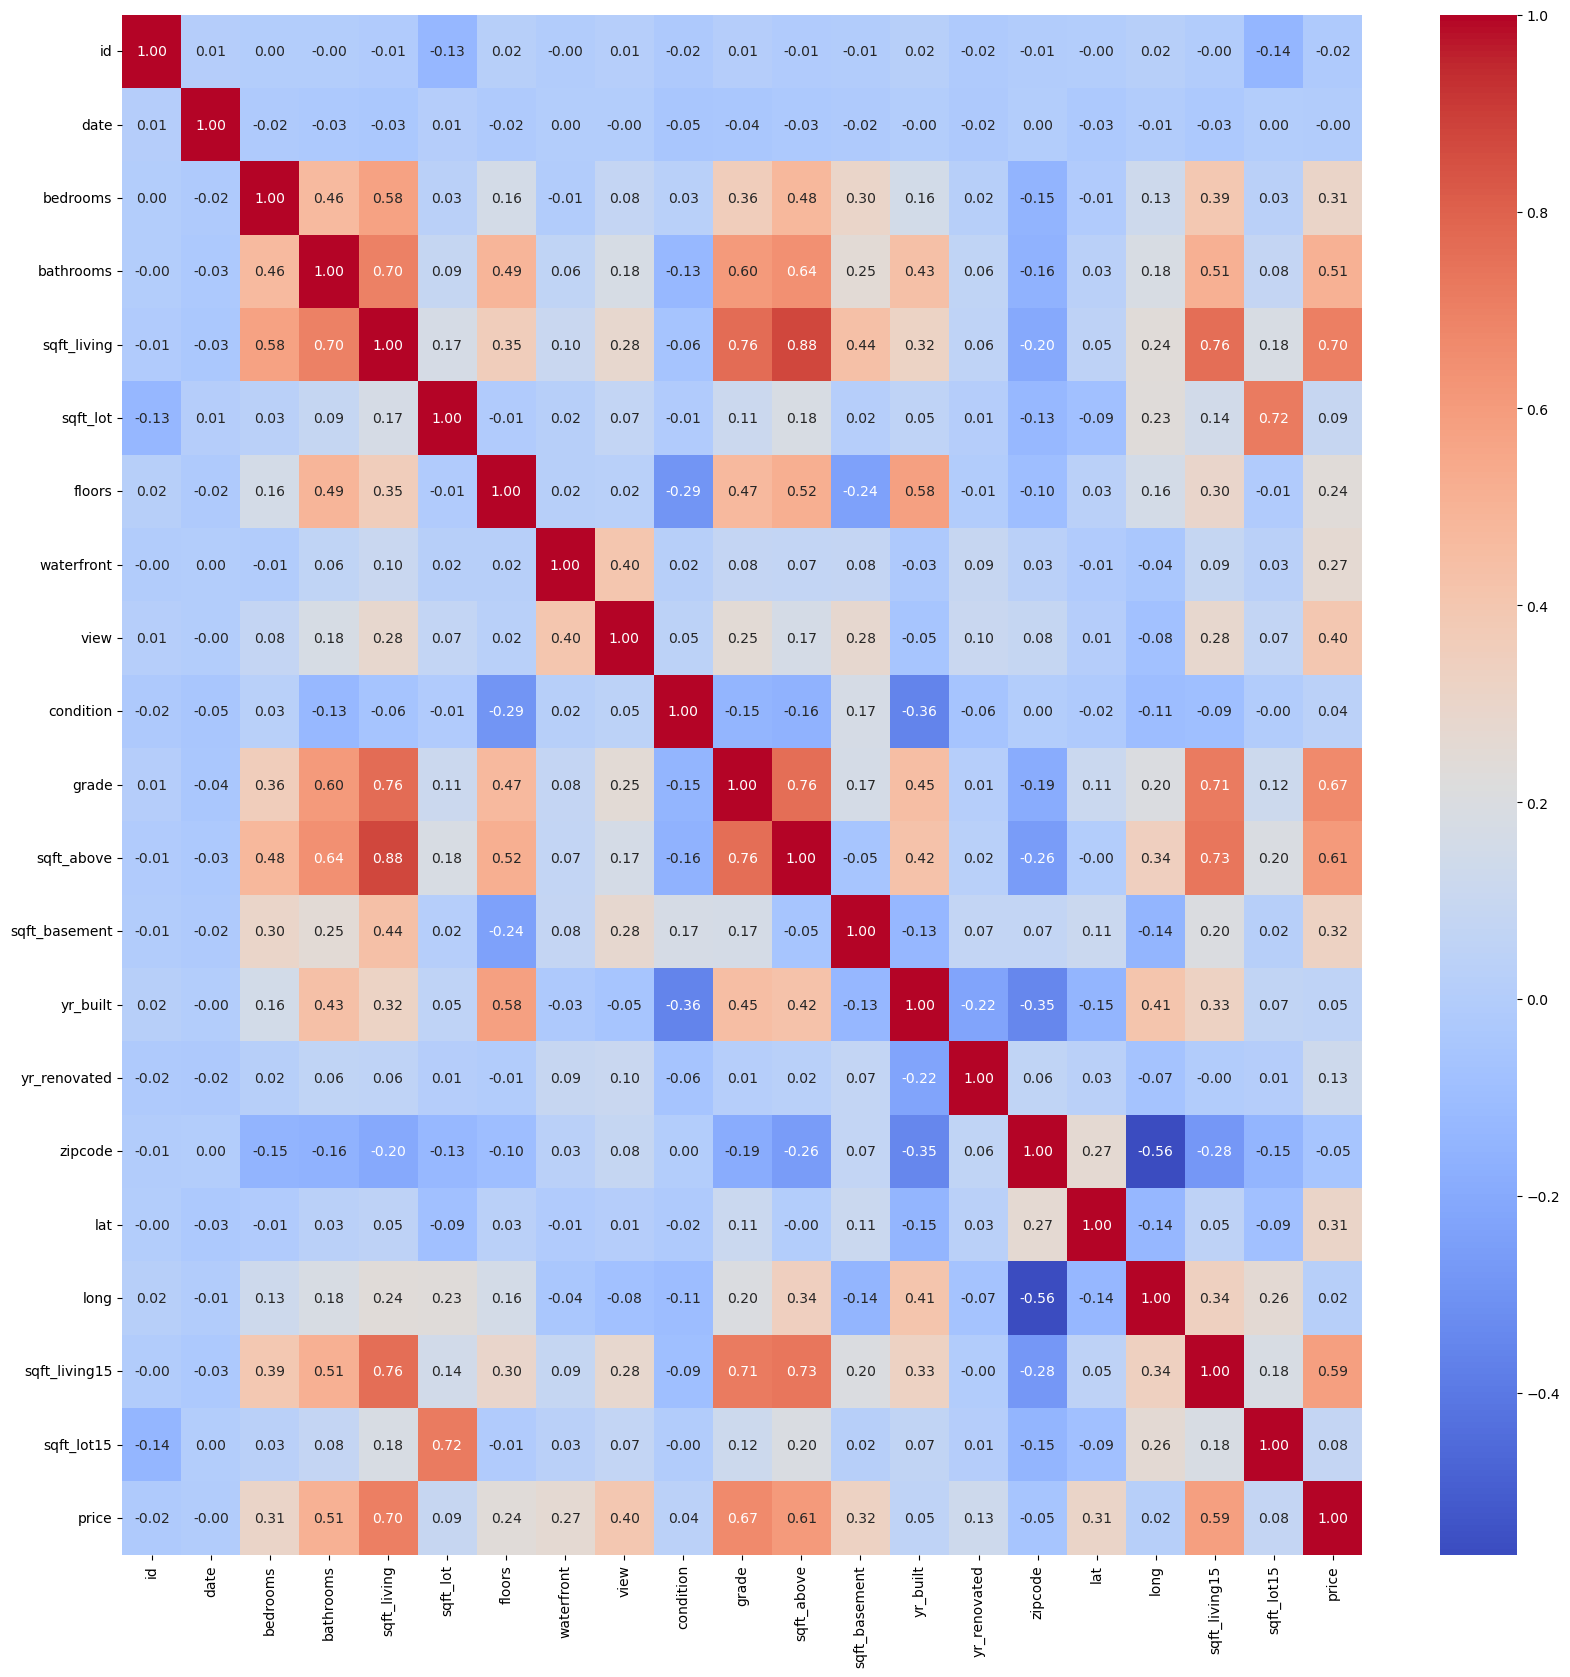

In [13]:
#Plotting the correlation of the data
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

From this heatmap, we can see that sqft_living has a high correlation with sqft_above, maybe because they represent almost the same thing. Also, it has high relationship with sqft_living15, that represents the same but after a renovation, with data from 2015. I will not drop them now, but will revisit this after testing the models, to try and improve them.

In [14]:
#Converting the column date to datetime again
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

In [15]:
#Now, I will divide the data into numerical and categorical
categorical = data[['waterfront', 'view', 'condition', 'grade', 'zipcode', 'yr_built', 'yr_renovated']]
numerical = data.drop(['id','waterfront', 'view', 'condition', 'grade', 'zipcode', 'yr_built', 'yr_renovated', 'lat', 'long'], axis=1)

#I will also separate the location columns from the rest of the data
location = data[['lat', 'long']]

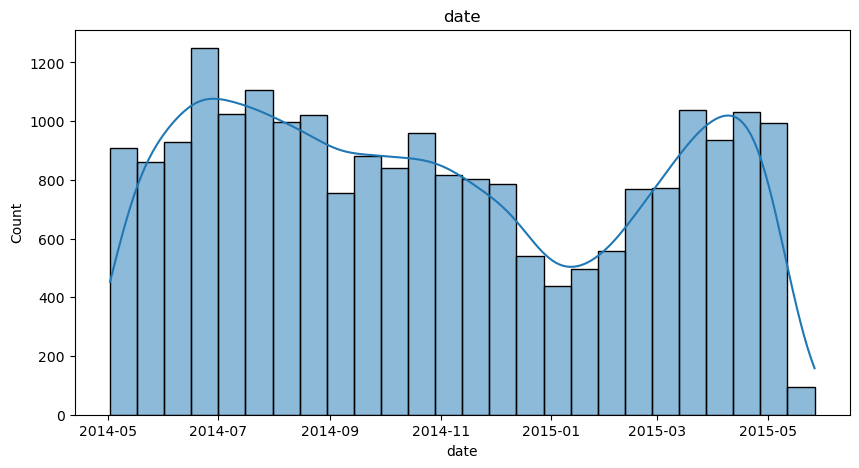

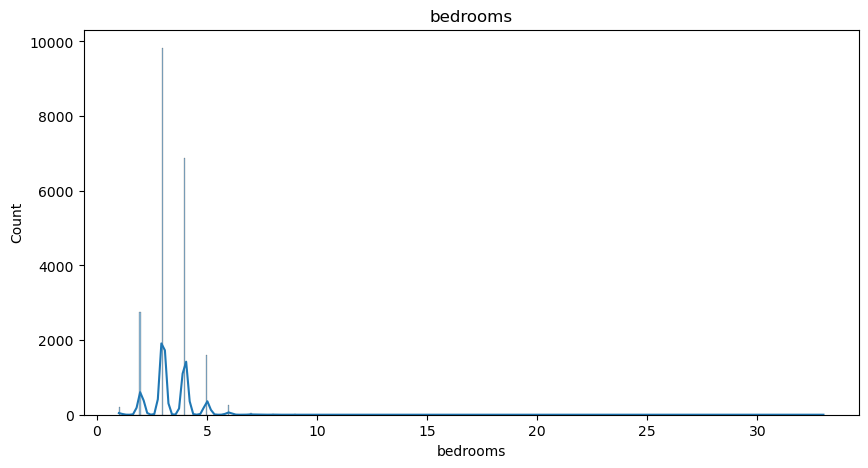

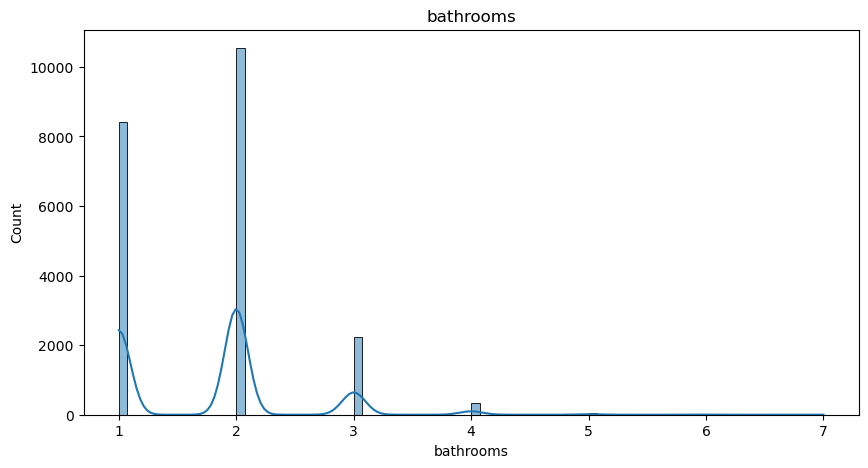

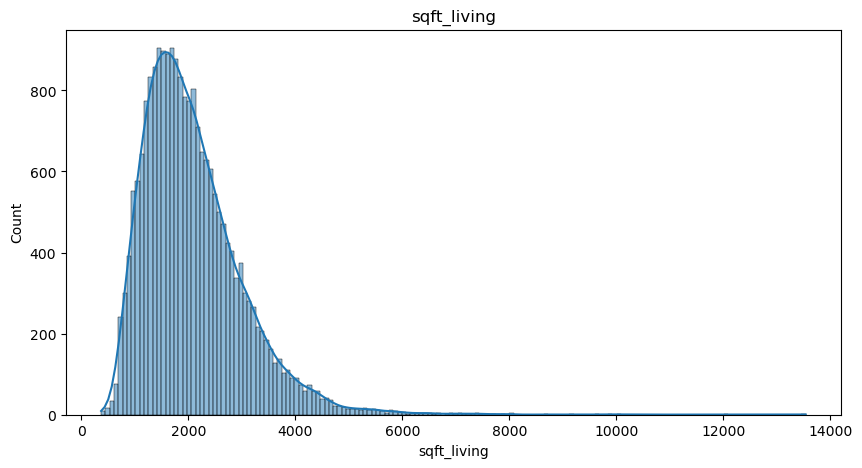

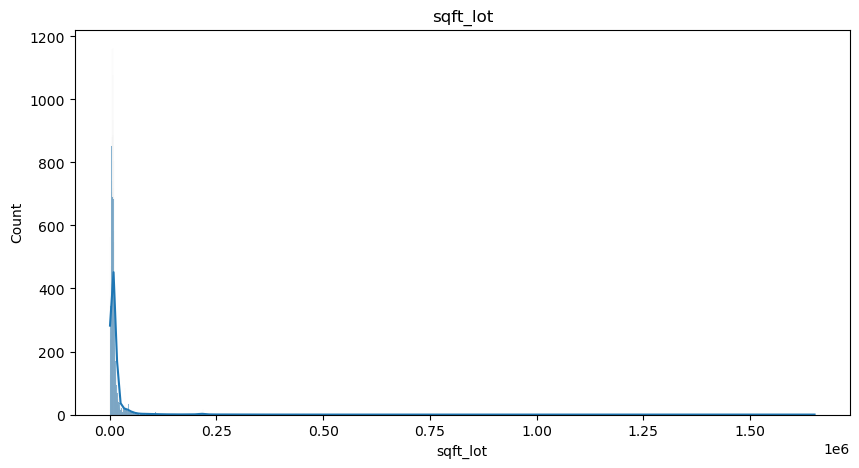

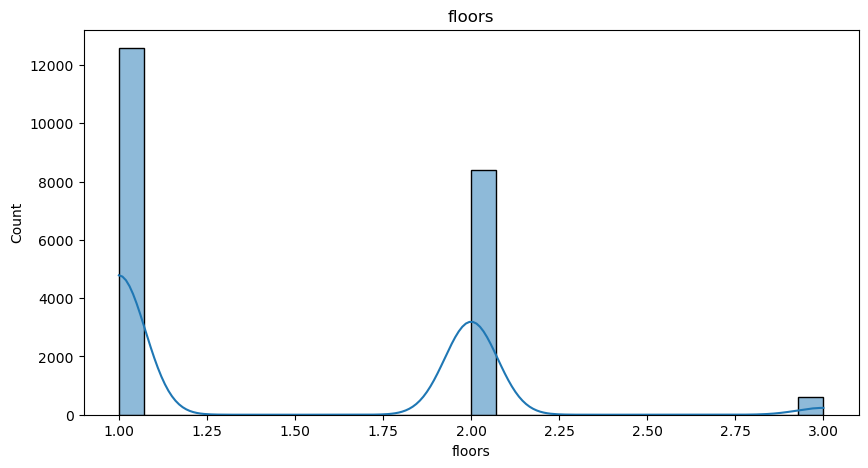

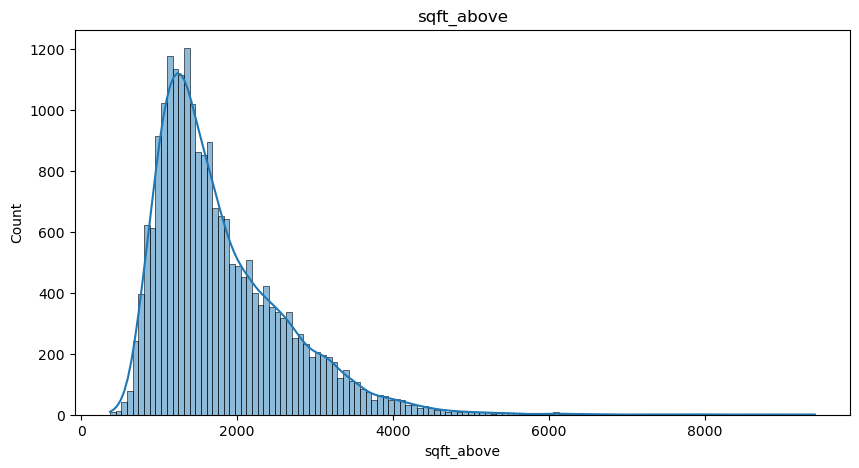

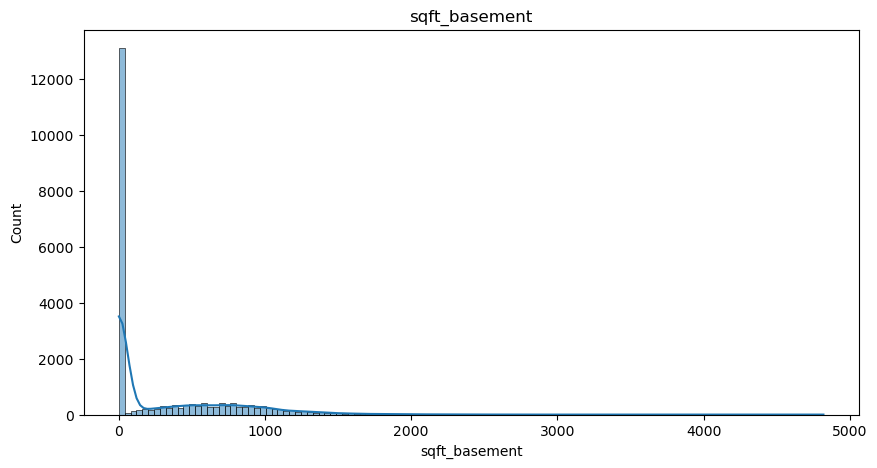

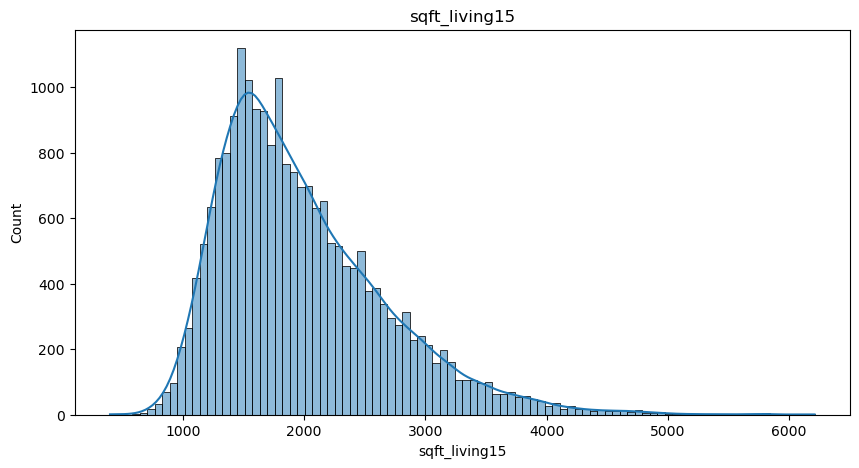

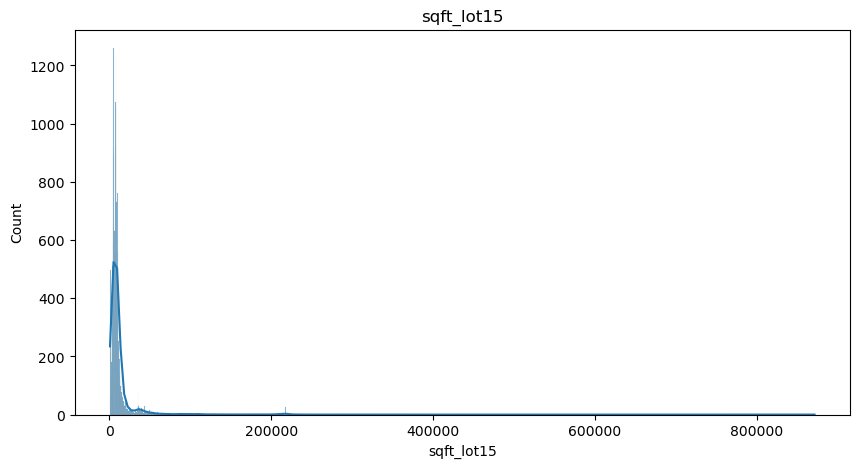

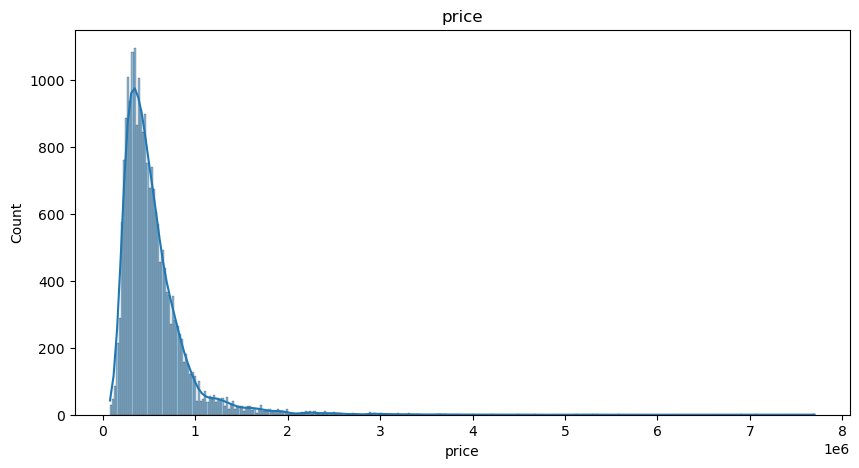

In [16]:
#Now, I will plot the distribution of the numerical columns
for i in numerical.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(numerical[i], kde=True)
    plt.title(i)
    plt.show()

From the plots, we can se some things:

- sqft_living, sqft_living15, sqft_above and price are normally distributed, with a little bit of skewnes to the left, indicating the pressence of outliers on the higher values.

- sqft_lot, sqft_basement and sqft_lot15 have high peaks at 0, meaning that a lot of houses don't have a lot or basement.

- For the other values, we can see that, having that low unique values, the graph doesn't give much information.

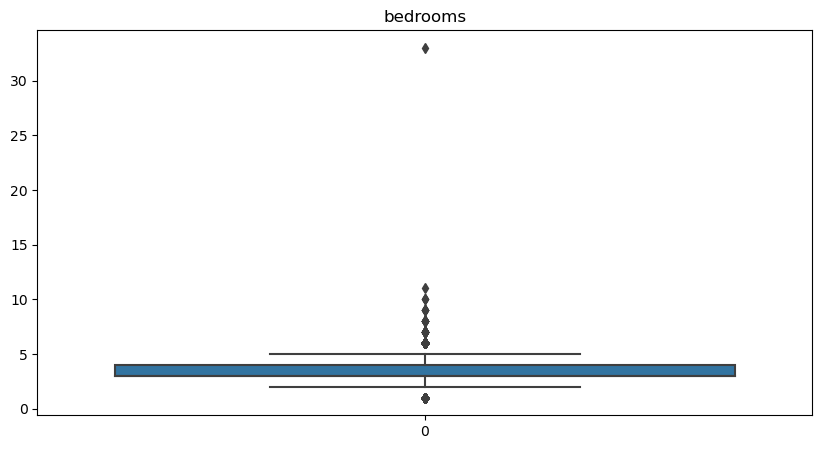

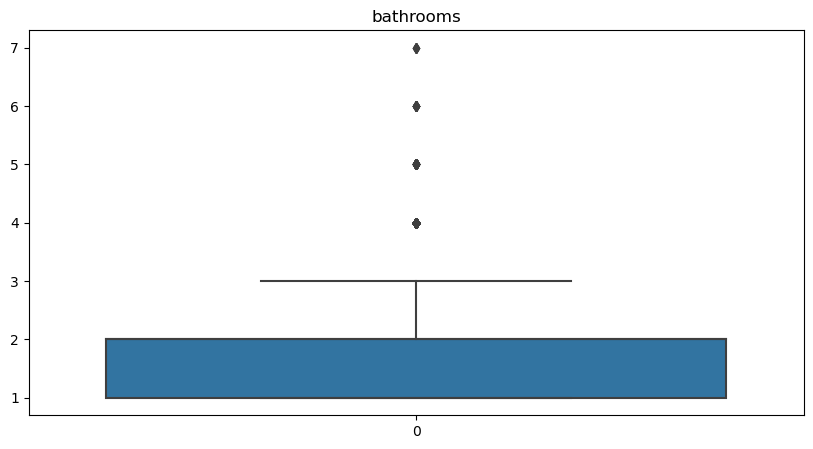

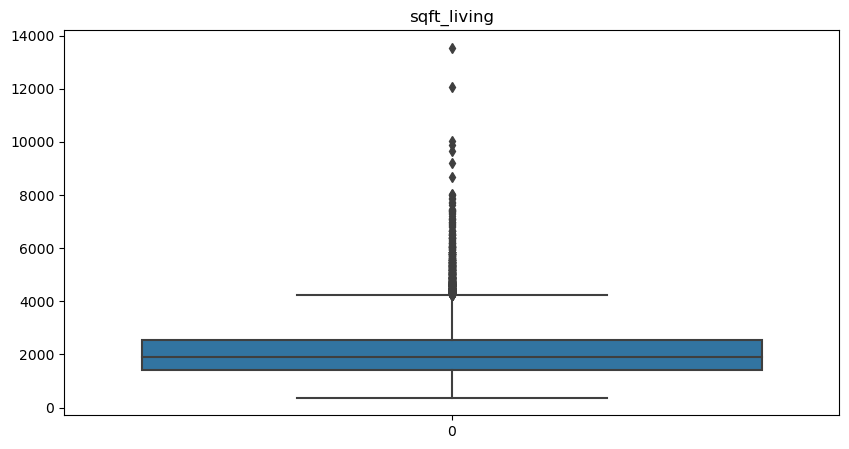

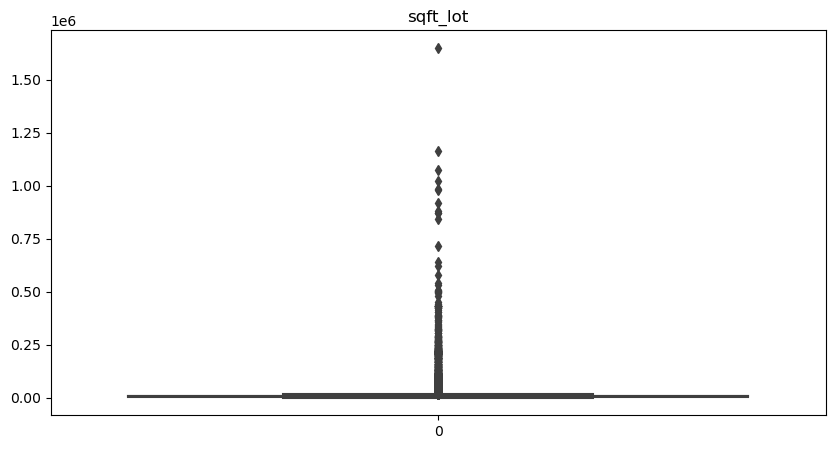

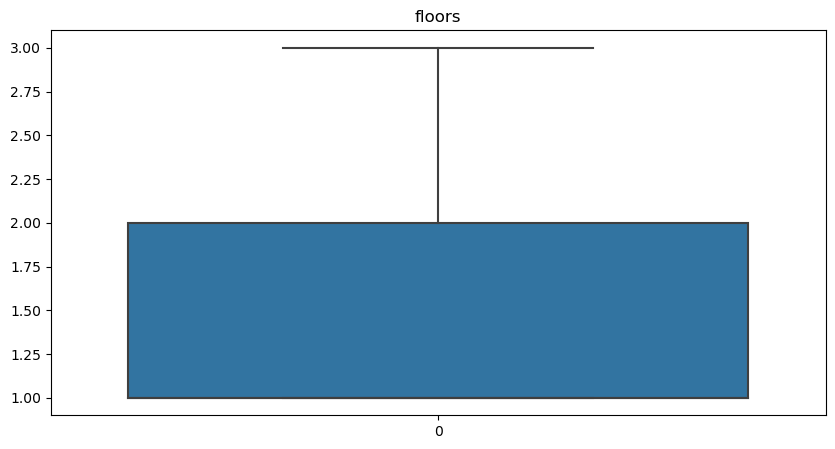

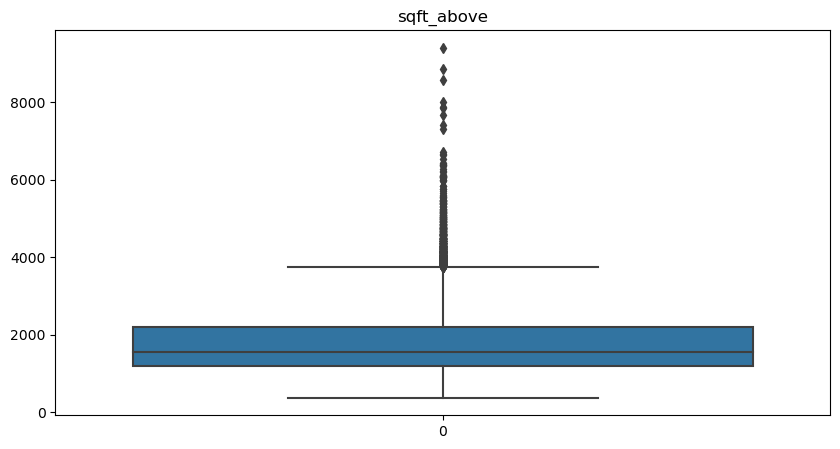

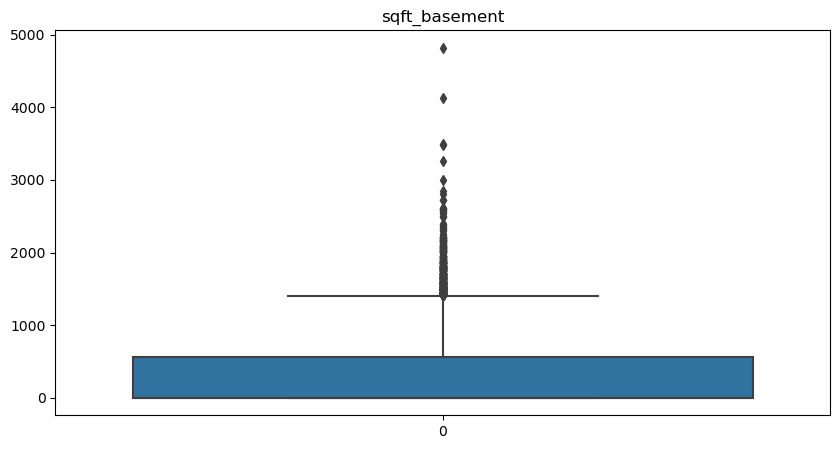

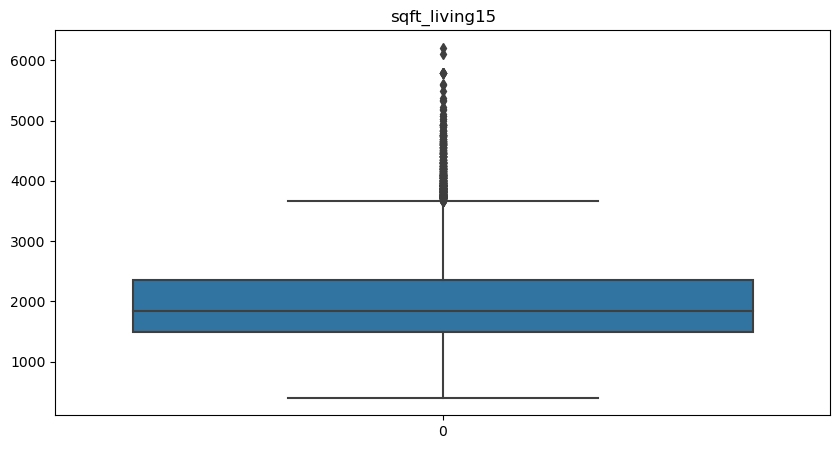

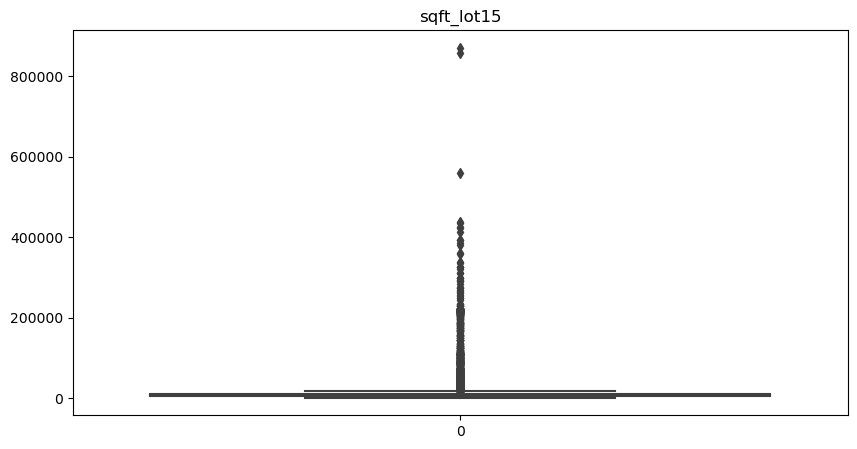

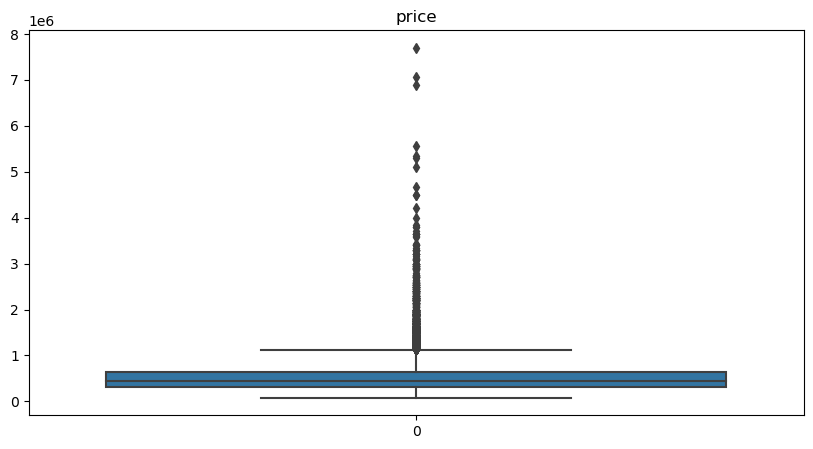

In [17]:
#Next, I will plot numerical with boxplots, to check for outliers, dropping date as it can't be plotted
for i in numerical.drop('date', axis=1).columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(numerical[i])
    plt.title(i)
    plt.show()

At first glance, we can see that there are a lot of outliers in the features.

Taking a closer look, we can get:

- sqft_lot and sqft_lot15 both have the box and the whiskers in 0, with everything else counted as an outlier.
- Everything, included price, finds its IQR and median towards the lower values.


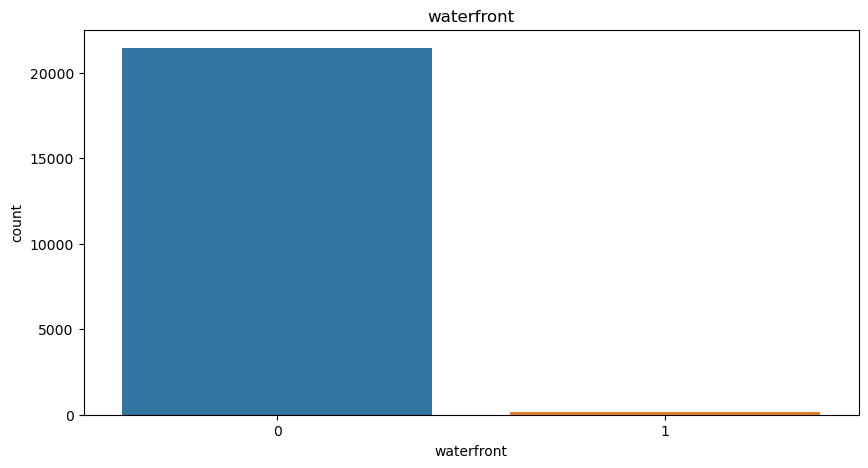

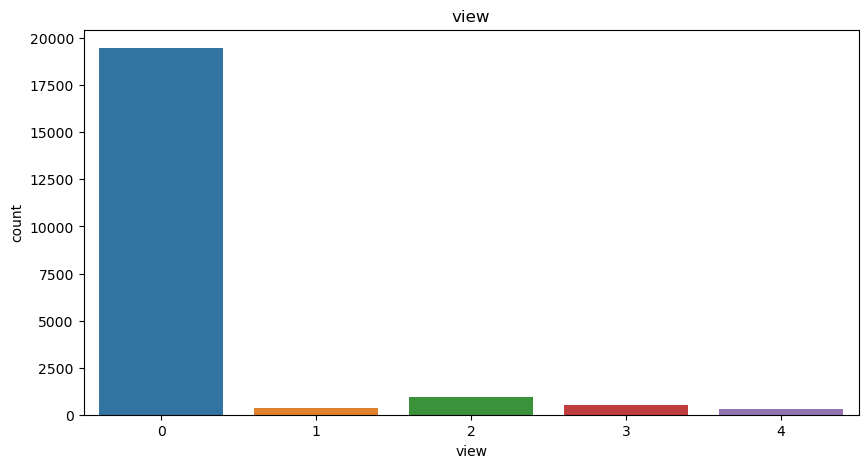

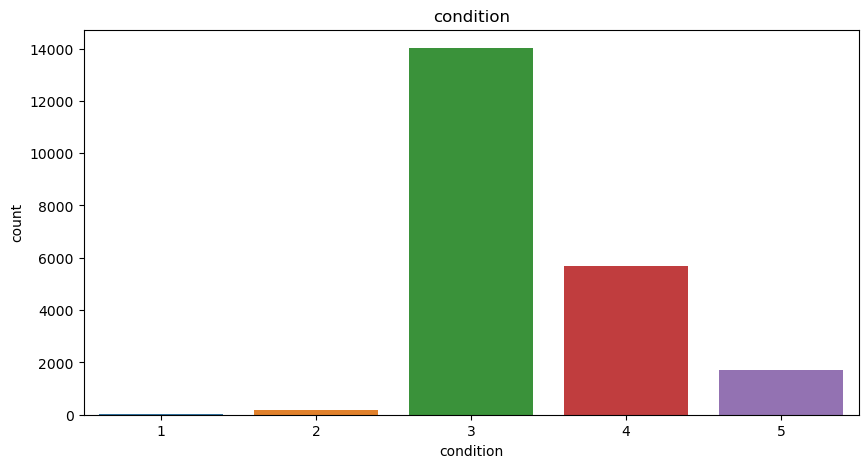

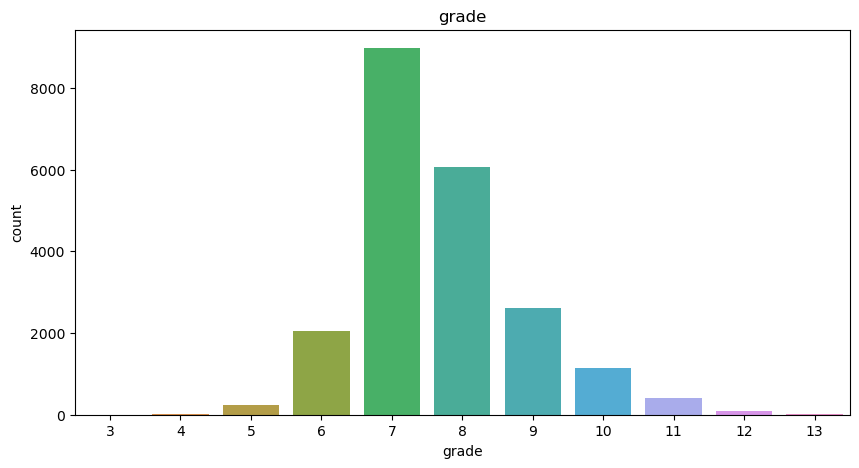

In [18]:
#Now, I will plot the categorical columns using barplots to get a first look at the data, dropping zipcode, year built and year renovated as they have too many unique values
for i in categorical.drop(['zipcode', 'yr_built', 'yr_renovated'], axis=1).columns:
    plt.figure(figsize=(10,5))
    sns.barplot(x=categorical[i].value_counts().index, y=categorical[i].value_counts())
    plt.title(i)
    plt.show()

Loooking at the plots we can get that:

- The grat majority of the houses don't have a view of a waterfront
- Most of the houses are at condition 3, so they are in good condition, but may need some renovations.
- The majority of the houses don't have appealing views.
- A big part of the houses are graded 7 or 8, no houses are graded 3 or les and only some houses are graded 12 or 13. So the majority of the houses are in good conditions.

Later with Tableau, we will make more insightful plots, so we can tell a better story about the data.

0.30878747195653244


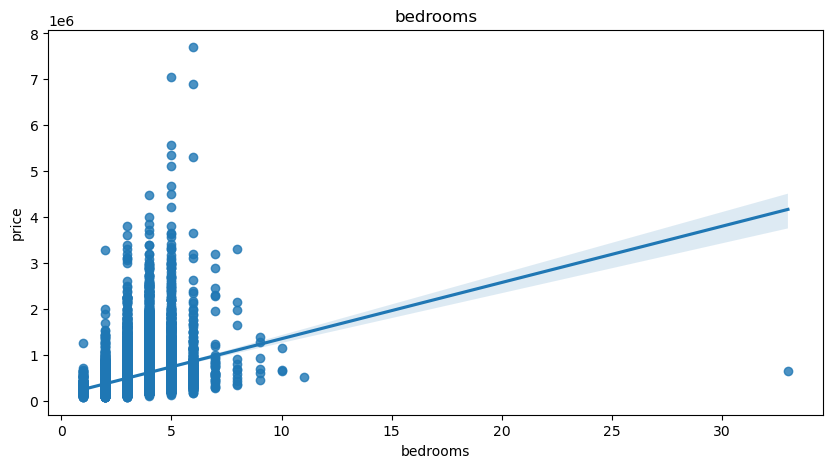

0.5105502123995256


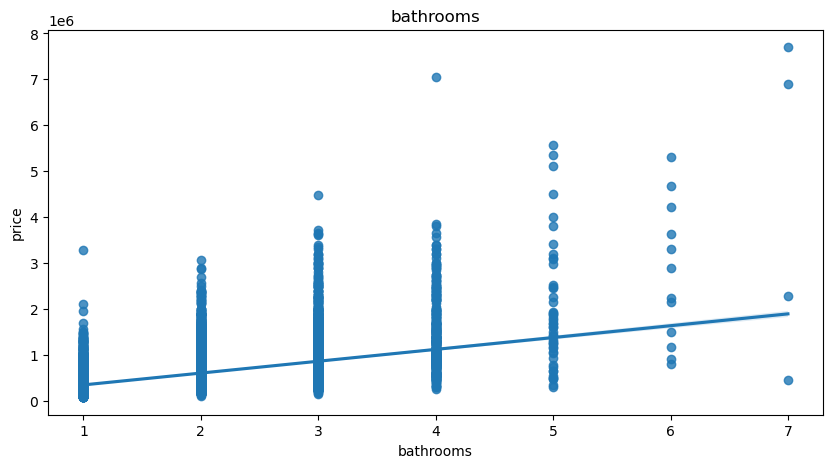

0.7019173021377595


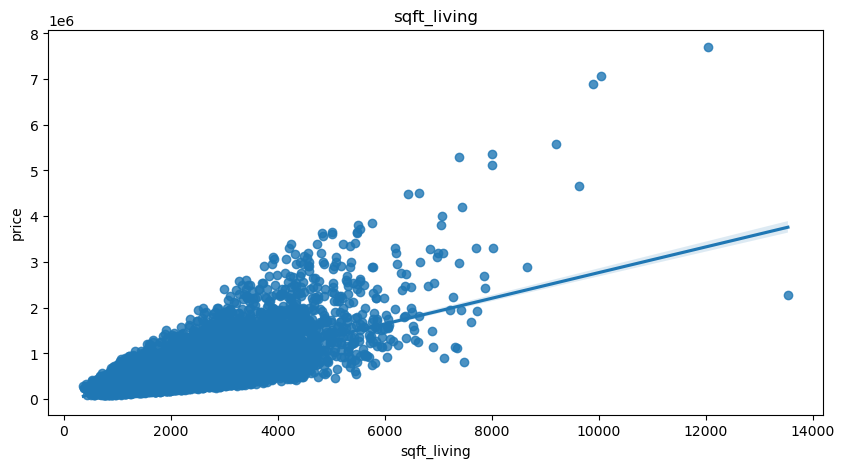

0.08987622099083867


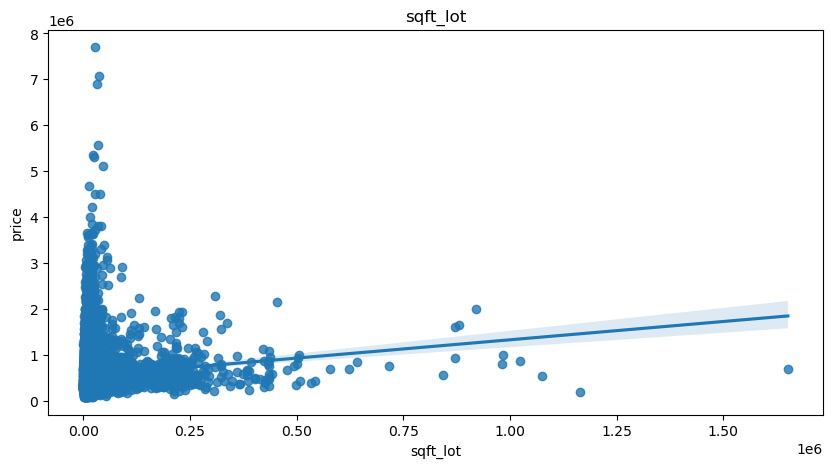

0.23726437379976312


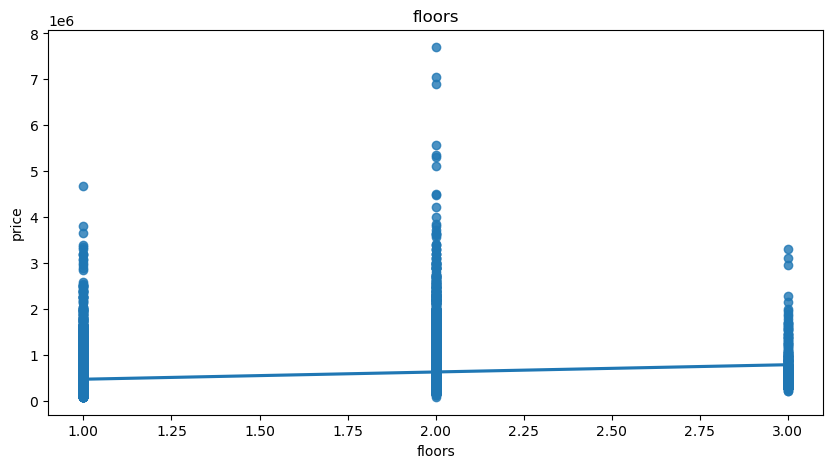

0.6053679437051804


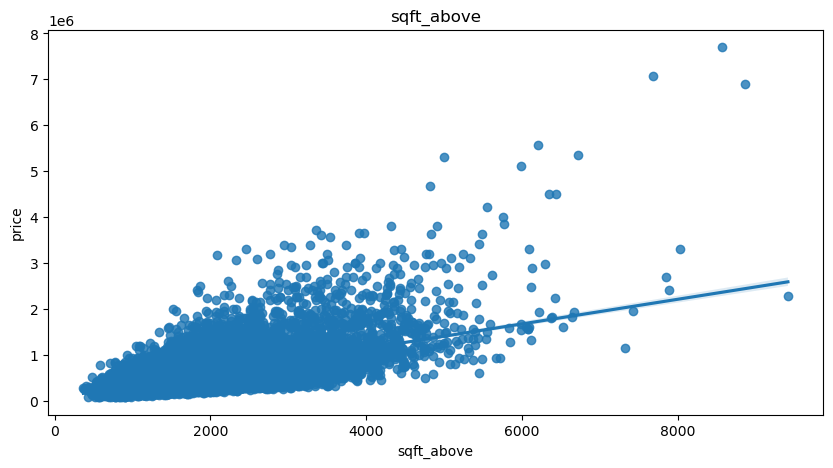

0.3237989068990473


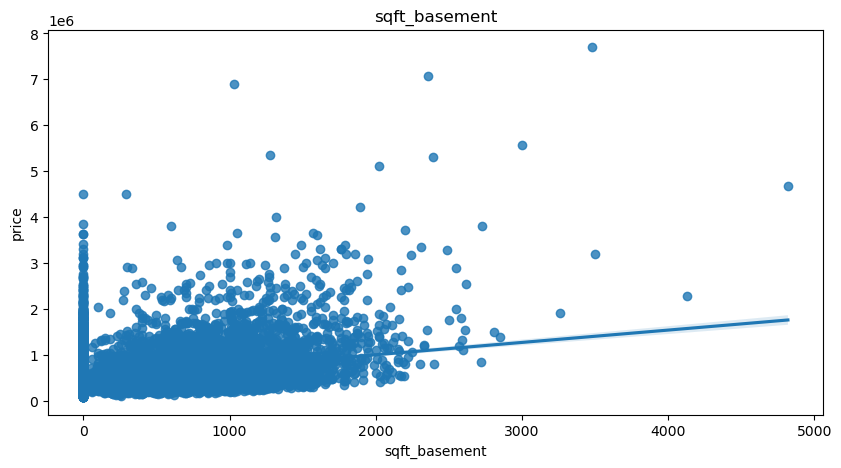

0.5852412017040663


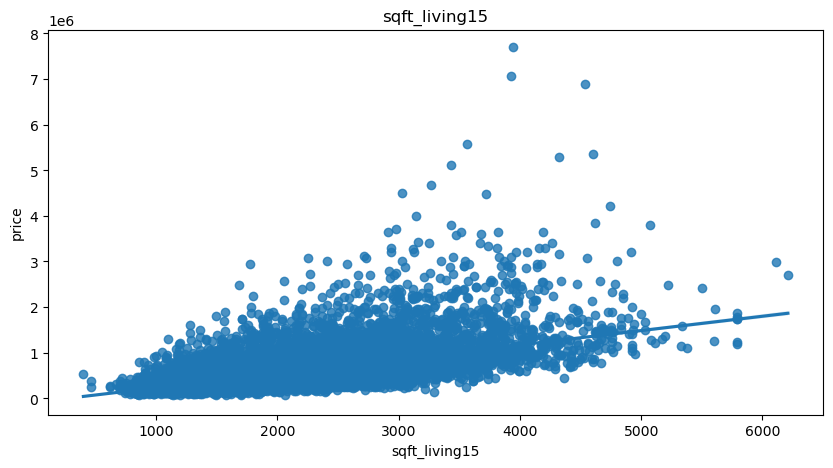

0.08284493117496435


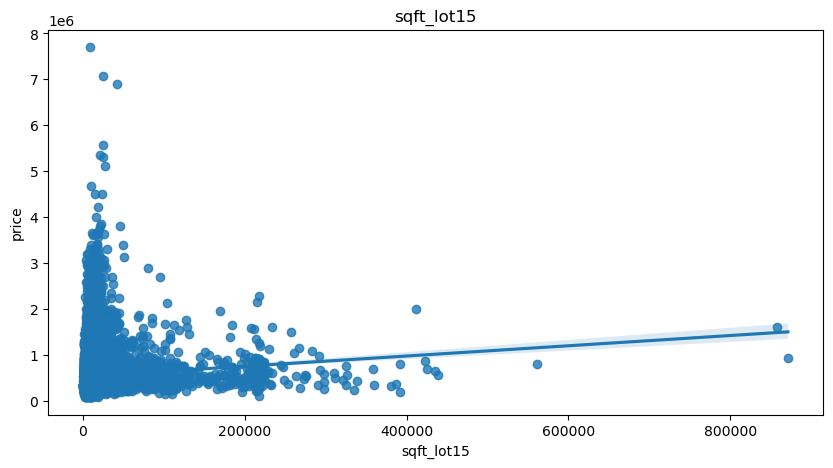

In [19]:
#the next step will be to check the relationship between the numerical columns and the target, price
for i in numerical.drop(['price', 'date'], axis=1).columns:
    print(numerical[i].corr(numerical['price']))
    plt.figure(figsize=(10,5))
    sns.regplot(x=numerical[i], y=numerical['price'])
    plt.title(i)
    plt.show()

0.2663984562473044


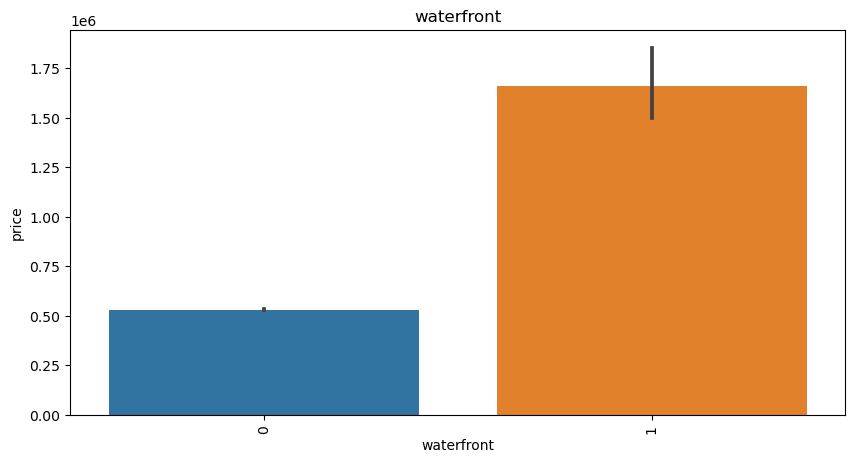

0.3973703029476877


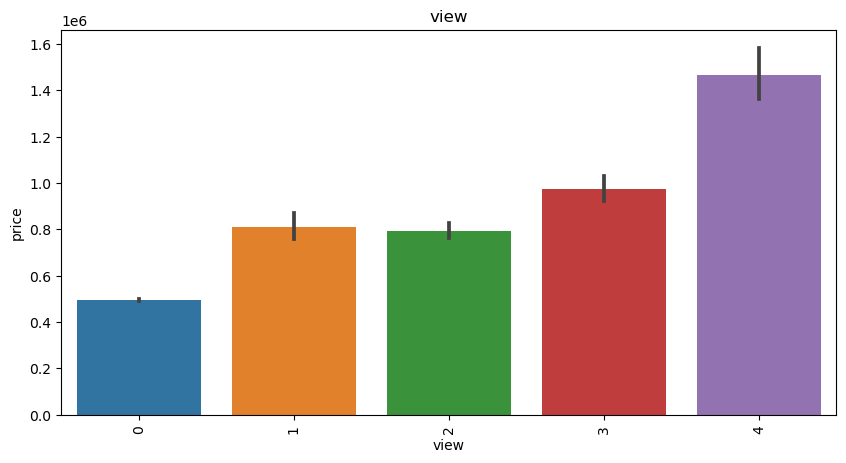

0.036056375486094944


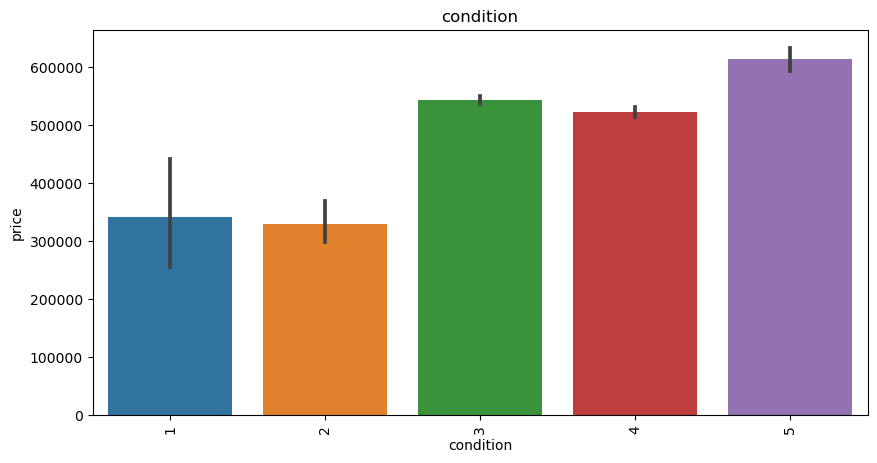

0.6679507713876465


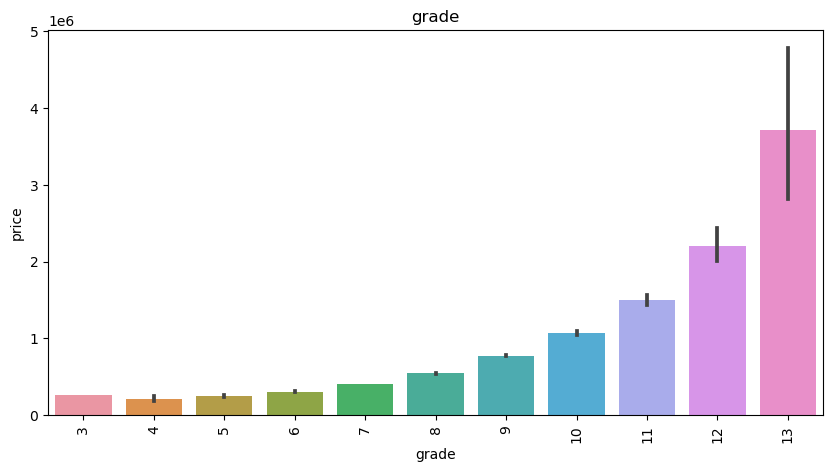

-0.053402434377724954


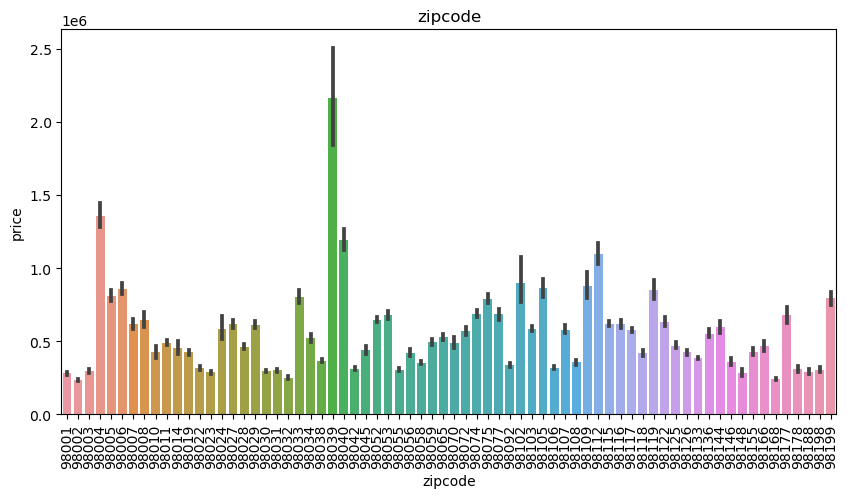

0.05395333346519119


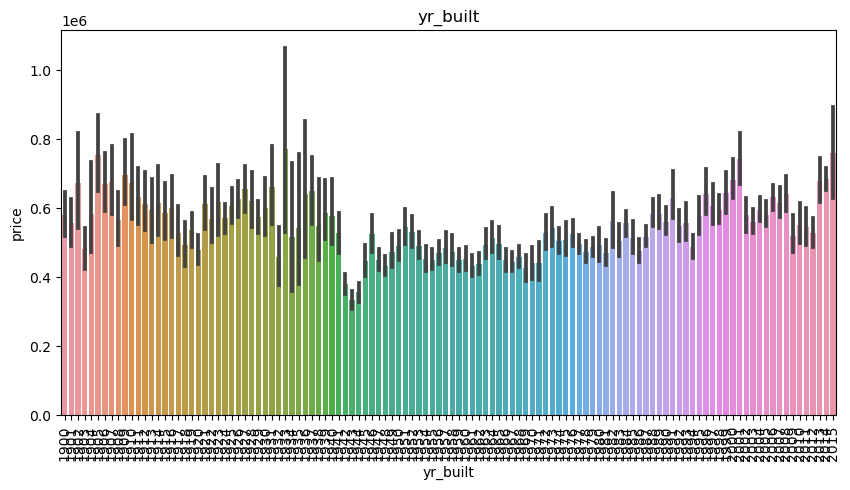

0.12642362379314492


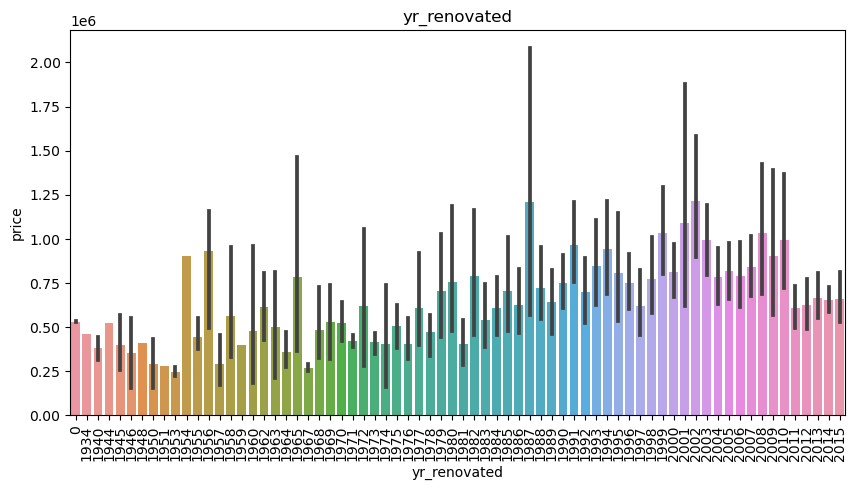

In [20]:
#Now, we will do the same with the categorical columns
for i in categorical.columns:
    print(categorical[i].corr(data['price']))
    plt.figure(figsize=(10,5))
    sns.barplot(x=categorical[i], y=data['price'])
    plt.xticks(rotation=90)
    plt.title(i)
    plt.show()

From checking the relationships, we can get some insights:

- Regarding the numerical columns, we have a lot of outliers, as we saw previously, and maybe they will affect the model. Even though we have those outliers, the sqft columns are prety clusterd on the line.
- For the categorical columns, most of the results are mostly reliable, with waterfront 1 and condition 1 have bigger variances and are less reliable.

In [28]:

#Now I will create a benchmark model to then work on which features to use, work with, modify or remove entirely.
#For that purpose, I will use a linear regression model, as it is the simplest model to use.

#First, I will split the data into X and y
X = data.drop(['id', 'price', 'date'], axis=1)
y = data['price']

#Now, I will split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Now I will create the model and train and test it
model = LogisticRegression()
model.fit(X_train, y_train)

#Now, I will check the results of the model to get some metrics
print('The accuracy of the model is:', model.score(X_test, y_test))
print("R2:", model.score(X_test, y_test))
print("MAE:", mean_absolute_error(model.predict(X_test), y_test))
print("RMSE:", mean_squared_error(model.predict(X_test), y_test, squared=False))


The accuracy of the model is: 0.007638888888888889
R2: 0.007638888888888889
MAE: 183710.9199074074
RMSE: 307354.0806337656


<Axes: xlabel='price'>

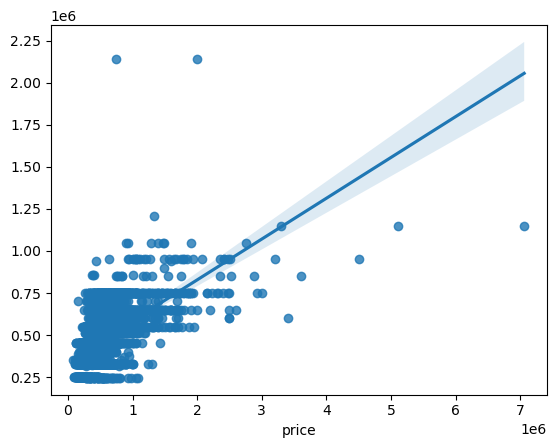

In [29]:
#Plotting the results of the model
sns.regplot(x=y_test, y=model.predict(X_test))